# MCRNI Single Model 

In [18]:
from scipy.stats import rankdata 
import numpy as np
from MCRNI import MCRNI
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


In [19]:
#calculate rank of each item in array
my_array = np.array([3, 5, 2, 1, 1, 9, 9, 9])
ranks = rankdata(my_array, method='ordinal') 
print("Array:", my_array)
print("Rank:", ranks)


Array: [3 5 2 1 1 9 9 9]
Rank: [4 5 3 1 2 6 7 8]


In [20]:
# Simulated small dataset
y_true = [1, 1, 1, 1, 1, 0, 0, 0, 0]  # 5 positives, 4 negatives
y_scores = [80, 87, 95, 90, 85, 92, 86, 81, 78]  # Example scores

model = MCRNI(y_true, y_scores)
model.__rank__()  # Compute rank sums and U stats
model.compute_mcrni_with_auc(0.5)  # Compute MCRNI using AUC=0.5
scrni = model.scrni()
print(scrni)
model.print_report(threshold=85)


3.0
📊 === Model Evaluation Report ===

Rank Sum (Positive group): 28.00
Rank Sum (Negative group): 17.00
U Statistic (Positive group): 13.00
U Statistic (Negative group): 7.00
MCRNI (compared to threshold or reference): 0.6000

🔍 Classification Metrics (threshold = 85.00):
Confusion Matrix: [[2, 2], [1, 4]]
Accuracy: 0.6667
Precision: 0.6667
Recall: 0.8000
F1 Score: 0.7273
ROC-AUC: 0.6500

📈 ROC-AUC Score (probability ranking): 0.6500


In [21]:

# Load dataset
df = pd.read_csv("input_data/CRT_sentiment.csv")




In [22]:
# True labels (for both models)
y_true = [1, 1, 1, 1, 0, 0, 0]  # Group A (4 positive) + Group B (3 negative)

# Model 1 predicted probabilities
y_scores_1 = [0.9, 0.8, 0.6, 0.5, 0.7, 0.4, 0.5]

# Model 2 predicted probabilities
y_scores_2 = [0.9, 0.7, 0.8, 0.6, 0.4, 0.3, 0.1]


# Instantiate and compute for both models
model1 = MCRNI(y_true, y_scores_1)
model2 = MCRNI(y_true, y_scores_2)

# Rank both
model1.__rank__()
model2.__rank__()

# # Use model 2 to get threshold rank
#r_thresh_model2 = model2.rank_sum_pos  # This is R_A^# from model 2
# # Compute MCRNI of model1 relative to model2's threshold
#model1.compute_mcrni_with_R_pos(r_thresh_model2)


# # Print report
print("model1")
model1.print_report(threshold=0.5)  # or any other binarization threshold



model1
📊 === Model Evaluation Report ===

Rank Sum (Positive group): 19.00
Rank Sum (Negative group): 9.00
U Statistic (Positive group): 9.00
U Statistic (Negative group): 3.00
MCRNI not computed yet. Run compute_mcrni_with_auc() or compute_mcrni_with_R_pos().

🔍 Classification Metrics (threshold = 0.50):
Confusion Matrix: [[1, 2], [0, 4]]
Accuracy: 0.7143
Precision: 0.6667
Recall: 1.0000
F1 Score: 0.8000
ROC-AUC: 0.7917

📈 ROC-AUC Score (probability ranking): 0.7917


In [23]:
df = pd.read_csv("input_data/Recall_topic.csv")

df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Ã¯Â»Â¿ID', 'text', 'label',
       'TFIDF_RF_prob', 'BERT_CNN_prob', 'TFIDF_LR_prob', 'GPT2_CNN_prob'],
      dtype='object')

# Recall Topic 
## (TFIDF_RF vs TFIDF_LR)

📊 === Model Evaluation Report ===

Rank Sum (Positive group): 16592.00
Rank Sum (Negative group): 14783.00
U Statistic (Positive group): 12937.00
U Statistic (Negative group): 1088.00
MCRNI (compared to threshold or reference): 69.7000

🔍 Classification Metrics (threshold = 0.50):
Confusion Matrix: [[163, 2], [31, 54]]
Accuracy: 0.8680
Precision: 0.9643
Recall: 0.6353
F1 Score: 0.7660
ROC-AUC: 0.9224

📈 ROC-AUC Score (probability ranking): 0.9224
📊 === Model Evaluation Report ===

Rank Sum (Positive group): 16471.00
Rank Sum (Negative group): 14904.00
U Statistic (Positive group): 12816.00
U Statistic (Negative group): 1209.00
MCRNI (compared to threshold or reference): 68.2765

🔍 Classification Metrics (threshold = 0.50):
Confusion Matrix: [[152, 13], [32, 53]]
Accuracy: 0.8200
Precision: 0.8030
Recall: 0.6235
F1 Score: 0.7020
ROC-AUC: 0.9138

📈 ROC-AUC Score (probability ranking): 0.9138
🔁 Relative MCRNI (Model 1 → Model 2 reference): 1.4235


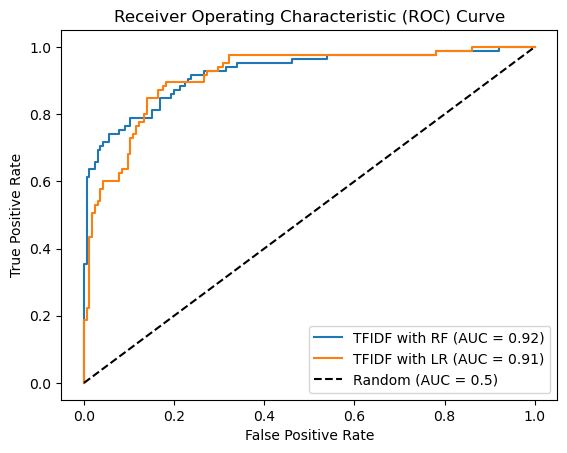

In [24]:

# Load dataset
df = pd.read_csv("input_data/Recall_topic.csv")
y_true = df["label"]
y_scores1 = df["TFIDF_RF_prob"]
y_scores2 = df["TFIDF_LR_prob"]
# TFIDF_RF_prob
# BERT_CNN_prob
# TFIDF_LR_prob
# GPT2_CNN_prob

# Initialize model
model1 = MCRNI(y_true, y_scores1)
model2= MCRNI(y_true, y_scores2)

# Compute ranks and MCRNI
model1.__rank__()
model1.compute_mcrni_with_auc(a=0.5)

# Compute ranks and MCRNI
model2.__rank__()
model2.compute_mcrni_with_auc(a=0.5)

# Print full evaluation report
model1.print_report()

# Print full evaluation report
model2.print_report()


# Use Model 2's positive rank sum as the reference threshold
r_thresh_ref = model2.rank_sum_pos

# Now compute Model 1's MCRNI relative to that threshold
mcrni_relative = model1.compute_mcrni_with_R_pos(r_thresh_ref)

# Print result
print(f"🔁 Relative MCRNI (Model 1 → Model 2 reference): {mcrni_relative:.4f}")

MCRNI.plot_roc_curves([model1, model2], ["TFIDF with RF", "TFIDF with LR"])


# Recall Topic 
## (TFIDF_RF vs TFIDF_LR vs BERT_CNN vs GPT2_CNN)

📊 === Model Evaluation Report ===

Rank Sum (Positive group): 16592.00
Rank Sum (Negative group): 14783.00
U Statistic (Positive group): 12937.00
U Statistic (Negative group): 1088.00
MCRNI (compared to threshold or reference): 69.7000

🔍 Classification Metrics (threshold = 0.50):
Confusion Matrix: [[163, 2], [31, 54]]
Accuracy: 0.8680
Precision: 0.9643
Recall: 0.6353
F1 Score: 0.7660
ROC-AUC: 0.9224

📈 ROC-AUC Score (probability ranking): 0.9224
📊 === Model Evaluation Report ===

Rank Sum (Positive group): 16471.00
Rank Sum (Negative group): 14904.00
U Statistic (Positive group): 12816.00
U Statistic (Negative group): 1209.00
MCRNI (compared to threshold or reference): 68.2765

🔍 Classification Metrics (threshold = 0.50):
Confusion Matrix: [[152, 13], [32, 53]]
Accuracy: 0.8200
Precision: 0.8030
Recall: 0.6235
F1 Score: 0.7020
ROC-AUC: 0.9138

📈 ROC-AUC Score (probability ranking): 0.9138
📊 === Model Evaluation Report ===

Rank Sum (Positive group): 16958.00
Rank Sum (Negative group):

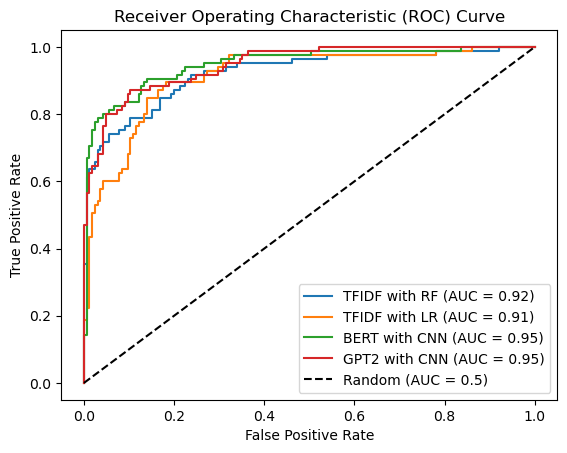

In [26]:
# Load dataset
df = pd.read_csv("input_data/Recall_topic.csv")
y_true = df["label"]
y_scores1 = df["TFIDF_RF_prob"]
y_scores2 = df["TFIDF_LR_prob"]
y_scores3 = df["BERT_CNN_prob"]
y_scores4 = df["GPT2_CNN_prob"]
# TFIDF_RF_prob
# BERT_CNN_prob
# TFIDF_LR_prob
# GPT2_CNN_prob

# Initialize model
model1 = MCRNI(y_true, y_scores1)
model2= MCRNI(y_true, y_scores2)
model3 = MCRNI(y_true, y_scores3)
model4= MCRNI(y_true, y_scores4)

# Compute ranks and MCRNI
model1.__rank__()
model1.compute_mcrni_with_auc(a=0.5)

# Compute ranks and MCRNI
model2.__rank__()
model2.compute_mcrni_with_auc(a=0.5)

model3.__rank__()
model3.compute_mcrni_with_auc(a=0.5)

model4.__rank__()
model4.compute_mcrni_with_auc(a=0.5)

# Print full evaluation report
model1.print_report()
model2.print_report()
model3.print_report()
model4.print_report()

# Use Model 2's positive rank sum as the reference threshold
r_thresh_ref = model4.rank_sum_pos

mcrni_1_recall_top = model1.compute_mcrni_with_auc(a = 0.5)
mcrni_2_recall_top = model2.compute_mcrni_with_auc(a = 0.5)
mcrni_3_recall_top = model3.compute_mcrni_with_auc(a = 0.5)
mcrni_4_recall_top = model4.compute_mcrni_with_auc(a = 0.5)

# Now compute Model 1's MCRNI relative to that threshold
mcrni_relative1_recall_top = model1.compute_mcrni_with_R_pos(r_thresh_ref)
mcrni_relative2_recall_top = model2.compute_mcrni_with_R_pos(r_thresh_ref)
mcrni_relative3_recall_top = model3.compute_mcrni_with_R_pos(r_thresh_ref)

# Print result
print(f"🔁 Relative MCRNI (Model 1 → Model 4 reference): {mcrni_relative1_recall_top:.4f}")
print(f"🔁 Relative MCRNI (Model 2 → Model 4 reference): {mcrni_relative2_recall_top:.4f}")
print(f"🔁 Relative MCRNI (Model 3 → Model 4 reference): {mcrni_relative3_recall_top:.4f}")


MCRNI.plot_roc_curves([model1, model2, model3, model4], ["TFIDF with RF", "TFIDF with LR", "BERT with CNN", "GPT2 with CNN"])

# CRT Topic 
## (TFIDF_RF vs TFIDF_LR vs BERT_CNN vs GPT2_CNN)

📊 === Model Evaluation Report ===

Rank Sum (Positive group): 13077.00
Rank Sum (Negative group): 18298.00
U Statistic (Positive group): 10997.00
U Statistic (Negative group): 907.00
MCRNI (compared to threshold or reference): 78.8281

🔍 Classification Metrics (threshold = 0.50):
Confusion Matrix: [[184, 2], [21, 43]]
Accuracy: 0.9080
Precision: 0.9556
Recall: 0.6719
F1 Score: 0.7890
ROC-AUC: 0.9238

📈 ROC-AUC Score (probability ranking): 0.9238
📊 === Model Evaluation Report ===

Rank Sum (Positive group): 13305.00
Rank Sum (Negative group): 18070.00
U Statistic (Positive group): 11225.00
U Statistic (Negative group): 679.00
MCRNI (compared to threshold or reference): 82.3906

🔍 Classification Metrics (threshold = 0.50):
Confusion Matrix: [[182, 4], [23, 41]]
Accuracy: 0.8920
Precision: 0.9111
Recall: 0.6406
F1 Score: 0.7523
ROC-AUC: 0.9430

📈 ROC-AUC Score (probability ranking): 0.9430
📊 === Model Evaluation Report ===

Rank Sum (Positive group): 13251.00
Rank Sum (Negative group): 18

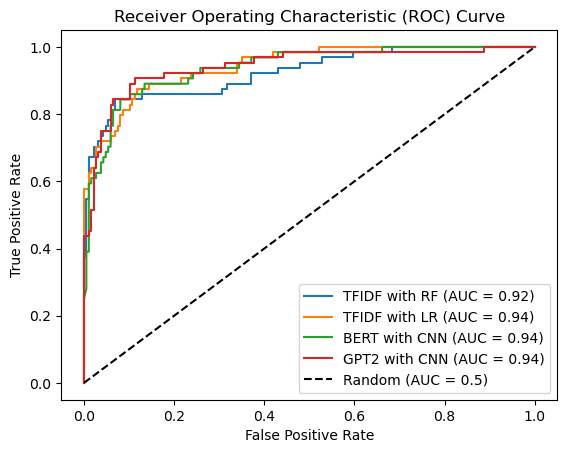

In [27]:
# Load dataset
df = pd.read_csv("input_data/CRT_topic.csv")
y_true = df["label"]
y_scores1 = df["TFIDF_RF_prob"]
y_scores2 = df["TFIDF_LR_prob"]
y_scores3 = df["BERT_CNN_prob"]
y_scores4 = df["GPT2_CNN_prob"]
# TFIDF_RF_prob
# BERT_CNN_prob
# TFIDF_LR_prob
# GPT2_CNN_prob

# Initialize model
model1 = MCRNI(y_true, y_scores1)
model2 = MCRNI(y_true, y_scores2)
model3 = MCRNI(y_true, y_scores3)
model4 = MCRNI(y_true, y_scores4)

# Compute ranks and MCRNI
model1.__rank__()
model1.compute_mcrni_with_auc(a=0.5)

# Compute ranks and MCRNI
model2.__rank__()
model2.compute_mcrni_with_auc(a=0.5)

model3.__rank__()
model3.compute_mcrni_with_auc(a=0.5)

model4.__rank__()
model4.compute_mcrni_with_auc(a=0.5)

# Print full evaluation report
model1.print_report()
model2.print_report()
model3.print_report()
model4.print_report()


# Use Model 2's positive rank sum as the reference threshold
r_thresh_ref = model4.rank_sum_pos

mcrni_1_crt_top = model1.compute_mcrni_with_auc(a = 0.5)
mcrni_2_crt_top = model2.compute_mcrni_with_auc(a = 0.5)
mcrni_3_crt_top = model3.compute_mcrni_with_auc(a = 0.5)
mcrni_4_crt_top = model4.compute_mcrni_with_auc(a = 0.5)

# Now compute Model 1's MCRNI relative to that threshold
mcrni_relative1_crt_top = model1.compute_mcrni_with_R_pos(r_thresh_ref)
mcrni_relative2_crt_top = model2.compute_mcrni_with_R_pos(r_thresh_ref)
mcrni_relative3_crt_top = model3.compute_mcrni_with_R_pos(r_thresh_ref)

# Print result
print(f"🔁 Relative MCRNI (Model 1 → Model 4 reference): {mcrni_relative1_crt_top:.4f}")
print(f"🔁 Relative MCRNI (Model 2 → Model 4 reference): {mcrni_relative2_crt_top:.4f}")
print(f"🔁 Relative MCRNI (Model 3 → Model 4 reference): {mcrni_relative3_crt_top:.4f}")

MCRNI.plot_roc_curves([model1, model2, model3, model4], ["TFIDF with RF", "TFIDF with LR", "BERT with CNN", "GPT2 with CNN"])

# Recall Sentiment 
## (TFIDF_RF vs TFIDF_LR vs BERT_CNN vs GPT2_CNN)

📊 === Model Evaluation Report ===

Rank Sum (Positive group): 37995.00
Rank Sum (Negative group): 5076.00
U Statistic (Positive group): 14124.00
U Statistic (Negative group): 2226.00
MCRNI (compared to threshold or reference): 27.2890

🔍 Classification Metrics (threshold = 0.50):
Confusion Matrix: [[34, 41], [9, 209]]
Accuracy: 0.8294
Precision: 0.8360
Recall: 0.9587
F1 Score: 0.8932
ROC-AUC: 0.8639

📈 ROC-AUC Score (probability ranking): 0.8639
📊 === Model Evaluation Report ===

Rank Sum (Positive group): 37293.00
Rank Sum (Negative group): 5778.00
U Statistic (Positive group): 13422.00
U Statistic (Negative group): 2928.00
MCRNI (compared to threshold or reference): 24.0688

🔍 Classification Metrics (threshold = 0.50):
Confusion Matrix: [[43, 32], [21, 197]]
Accuracy: 0.8191
Precision: 0.8603
Recall: 0.9037
F1 Score: 0.8814
ROC-AUC: 0.8209

📈 ROC-AUC Score (probability ranking): 0.8209
📊 === Model Evaluation Report ===

Rank Sum (Positive group): 37763.00
Rank Sum (Negative group): 5

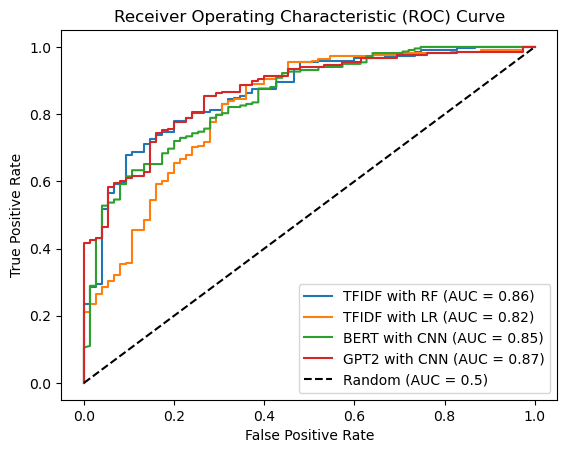

In [28]:
# Load dataset
df = pd.read_csv("input_data/Recall_sentiment.csv")
y_true = df["label"]
y_scores1 = df["TFIDF_RF_prob"]
y_scores2 = df["TFIDF_LR_prob"]
y_scores3 = df["BERT_CNN_prob"]
y_scores4 = df["GPT2_CNN_prob"]
# TFIDF_RF_prob
# BERT_CNN_prob
# TFIDF_LR_prob
# GPT2_CNN_prob

# Initialize model
model1 = MCRNI(y_true, y_scores1)
model2 = MCRNI(y_true, y_scores2)
model3 = MCRNI(y_true, y_scores3)
model4 = MCRNI(y_true, y_scores4)

# Compute ranks and MCRNI
model1.__rank__()
model1.compute_mcrni_with_auc(a=0.5)

# Compute ranks and MCRNI
model2.__rank__()
model2.compute_mcrni_with_auc(a=0.5)

model3.__rank__()
model3.compute_mcrni_with_auc(a=0.5)

model4.__rank__()
model4.compute_mcrni_with_auc(a=0.5)

# Print full evaluation report
model1.print_report()
model2.print_report()
model3.print_report()
model4.print_report()


# Use Model 2's positive rank sum as the reference threshold
r_thresh_ref = model4.rank_sum_pos

mcrni_1_recall_senti = model1.compute_mcrni_with_auc(a = 0.5)
mcrni_2_recall_senti = model2.compute_mcrni_with_auc(a = 0.5)
mcrni_3_recall_senti = model3.compute_mcrni_with_auc(a = 0.5)
mcrni_4_recall_senti = model4.compute_mcrni_with_auc(a = 0.5)

# Now compute Model 1's MCRNI relative to that threshold
mcrni_relative1_recall_senti = model1.compute_mcrni_with_R_pos(r_thresh_ref)
mcrni_relative2_recall_senti = model2.compute_mcrni_with_R_pos(r_thresh_ref)
mcrni_relative3_recall_senti = model3.compute_mcrni_with_R_pos(r_thresh_ref)

# Print result
print(f"🔁 Relative MCRNI (Model 1 → Model 4 reference): {mcrni_relative1_recall_senti:.4f}")
print(f"🔁 Relative MCRNI (Model 2 → Model 4 reference): {mcrni_relative2_recall_senti:.4f}")
print(f"🔁 Relative MCRNI (Model 3 → Model 4 reference): {mcrni_relative3_recall_senti:.4f}")


#sum_reletive = mcrni_relative1 + mcrni_relative2 +  mcrni_relative3
#print(f"🔁 Relative MCRNI SUM: {sum_reletive:.4f}")

MCRNI.plot_roc_curves([model1, model2, model3, model4], ["TFIDF with RF", "TFIDF with LR", "BERT with CNN", "GPT2 with CNN"])

# CRT Sentiment 
## (TFIDF_RF vs TFIDF_LR vs BERT_CNN vs GPT2_CNN)

📊 === Model Evaluation Report ===

Rank Sum (Positive group): 19773.00
Rank Sum (Negative group): 12612.00
U Statistic (Positive group): 11898.00
U Statistic (Negative group): 4227.00
MCRNI (compared to threshold or reference): 30.6840

🔍 Classification Metrics (threshold = 0.50):
Confusion Matrix: [[99, 30], [51, 74]]
Accuracy: 0.6811
Precision: 0.7115
Recall: 0.5920
F1 Score: 0.6463
ROC-AUC: 0.7378

📈 ROC-AUC Score (probability ranking): 0.7378
📊 === Model Evaluation Report ===

Rank Sum (Positive group): 20403.00
Rank Sum (Negative group): 11982.00
U Statistic (Positive group): 12528.00
U Statistic (Negative group): 3597.00
MCRNI (compared to threshold or reference): 35.7240

🔍 Classification Metrics (threshold = 0.50):
Confusion Matrix: [[95, 34], [46, 79]]
Accuracy: 0.6850
Precision: 0.6991
Recall: 0.6320
F1 Score: 0.6639
ROC-AUC: 0.7769

📈 ROC-AUC Score (probability ranking): 0.7769
📊 === Model Evaluation Report ===

Rank Sum (Positive group): 20126.00
Rank Sum (Negative group): 

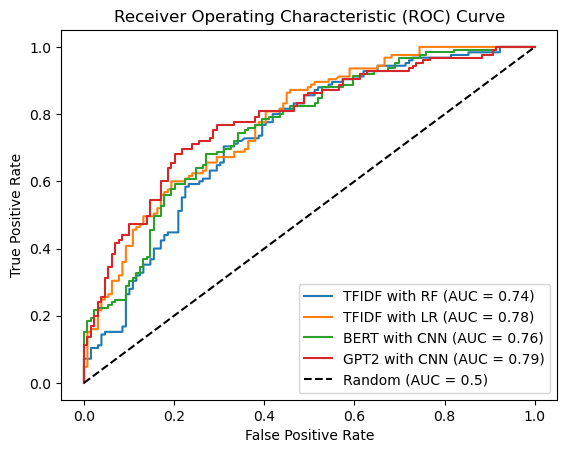

In [17]:
# Load dataset
df = pd.read_csv("input_data/CRT_sentiment.csv")
y_true = df["label"]
y_scores1 = df["TFIDF_RF_prob"]
y_scores2 = df["TFIDF_LR_prob"]
y_scores3 = df["BERT_CNN_prob"]
y_scores4 = df["GPT2_CNN_prob"]
# TFIDF_RF_prob
# BERT_CNN_prob
# TFIDF_LR_prob
# GPT2_CNN_prob

# Initialize model
model1 = MCRNI(y_true, y_scores1)
model2 = MCRNI(y_true, y_scores2)
model3 = MCRNI(y_true, y_scores3)
model4 = MCRNI(y_true, y_scores4)

# Compute ranks and MCRNI
model1.__rank__()
model1.compute_mcrni_with_auc(a=0.5)

# Compute ranks and MCRNI
model2.__rank__()
model2.compute_mcrni_with_auc(a=0.5)

model3.__rank__()
model3.compute_mcrni_with_auc(a=0.5)

model4.__rank__()
model4.compute_mcrni_with_auc(a=0.5)

# Print full evaluation report
model1.print_report()
model2.print_report()
model3.print_report()
model4.print_report()


# Use Model 2's positive rank sum as the reference threshold
r_thresh_ref = model4.rank_sum_pos

mcrni_1_crt_senti = model1.compute_mcrni_with_auc(a = 0.5)
mcrni_2_crt_senti = model2.compute_mcrni_with_auc(a = 0.5)
mcrni_3_crt_senti = model3.compute_mcrni_with_auc(a = 0.5)
mcrni_4_crt_senti = model4.compute_mcrni_with_auc(a = 0.5)

# Now compute Model 1's MCRNI relative to that threshold
mcrni_relative1_crt_senti = model1.compute_mcrni_with_R_pos(r_thresh_ref)
mcrni_relative2_crt_senti = model2.compute_mcrni_with_R_pos(r_thresh_ref)
mcrni_relative3_crt_senti = model3.compute_mcrni_with_R_pos(r_thresh_ref)

# Print result
print(f"🔁 Relative MCRNI (Model 1 → Model 4 reference): {mcrni_relative1_crt_senti:.4f}")
print(f"🔁 Relative MCRNI (Model 2 → Model 4 reference): {mcrni_relative2_crt_senti:.4f}")
print(f"🔁 Relative MCRNI (Model 3 → Model 4 reference): {mcrni_relative3_crt_senti:.4f}")

MCRNI.plot_roc_curves([model1, model2, model3, model4], ["TFIDF with RF", "TFIDF with LR", "BERT with CNN", "GPT2 with CNN"])

# MCRNI Sum

In [75]:

mcrni_relative1_sum = mcrni_relative1_recall_top + mcrni_relative1_crt_top + mcrni_relative1_recall_senti + mcrni_relative1_crt_senti
print(f"🔁 Relative MCRNI SUM RF : {mcrni_relative1_sum:.4f}")

mcrni_relative2_sum = mcrni_relative2_recall_top + mcrni_relative2_crt_top + mcrni_relative2_recall_senti + mcrni_relative2_crt_senti
print(f"🔁 Relative MCRNI SUM LG : {mcrni_relative2_sum:.4f}")

mcrni_relative3_sum = mcrni_relative3_recall_top + mcrni_relative3_crt_top + mcrni_relative3_recall_senti + mcrni_relative3_crt_senti
print(f"🔁 Relative MCRNI SUM BERT : {mcrni_relative3_sum:.4f}")


mcrni_1_sum = mcrni_1_recall_top + mcrni_1_crt_top + mcrni_1_recall_senti + mcrni_1_crt_senti
print(f"🔁 MCRNI SUM RF : {mcrni_1_sum:.4f}")

mcrni_2_sum = mcrni_2_recall_top + mcrni_2_crt_top + mcrni_2_recall_senti + mcrni_2_crt_senti
print(f"🔁 MCRNI SUM LG : {mcrni_2_sum:.4f}")

mcrni_3_sum = mcrni_3_recall_top + mcrni_3_crt_top + mcrni_3_recall_senti + mcrni_3_crt_senti
print(f"🔁 MCRNI SUM BERT : {mcrni_3_sum:.4f}")

mcrni_4_sum = mcrni_4_recall_top + mcrni_4_crt_top + mcrni_4_recall_senti + mcrni_4_crt_senti
print(f"🔁 MCRNI SUM GPT: {mcrni_4_sum:.4f}")

🔁 Relative MCRNI SUM RF : -13.8694
🔁 Relative MCRNI SUM LG : -9.9106
🔁 Relative MCRNI SUM BERT : -5.0850
🔁 MCRNI SUM RF : 206.5011
🔁 MCRNI SUM LG : 210.4599
🔁 MCRNI SUM BERT : 215.2855
🔁 MCRNI SUM GPT: 220.3705


# MCRNI Grid Search 

In [5]:
import importlib.util
import sys

# Dynamically import plot.py
spec = importlib.util.spec_from_file_location("plot", "plot.py")
plot = importlib.util.module_from_spec(spec)
sys.modules["plot"] = plot
spec.loader.exec_module(plot)



/Users/shimengdai/Dropbox/Michigan State/Eighth semester/disseration/Chapter 3/mcrni/plot.py:16: SyntaxWarning: invalid escape sequence '\d'
  df['Model_Index'] = df['Model'].str.extract('(\d+)').astype(int)
/Users/shimengdai/Dropbox/Michigan State/Eighth semester/disseration/Chapter 3/mcrni/plot.py:39: SyntaxWarning: invalid escape sequence '\d'
  df['Model_Index'] = df['Model'].str.extract('(\d+)').astype(int)


In [ ]:
# Load the evaluation results
df = plot.load_metrics('results/metrics_summary.csv')

# Display first few rows
#df.head()
df.columns


Index(['Confusion Matrix', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
       'ROC-AUC', 'Model', 'MCRNI', 'Rank Sum Pos', 'Rank Sum Neg',
       'U Stat Pos', 'U Stat Neg'],
      dtype='object')

/Users/shimengdai/Dropbox/Michigan State/Eighth semester/disseration/Chapter 3/mcrni/plot.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_df, x='Model', y=metric, palette='viridis')


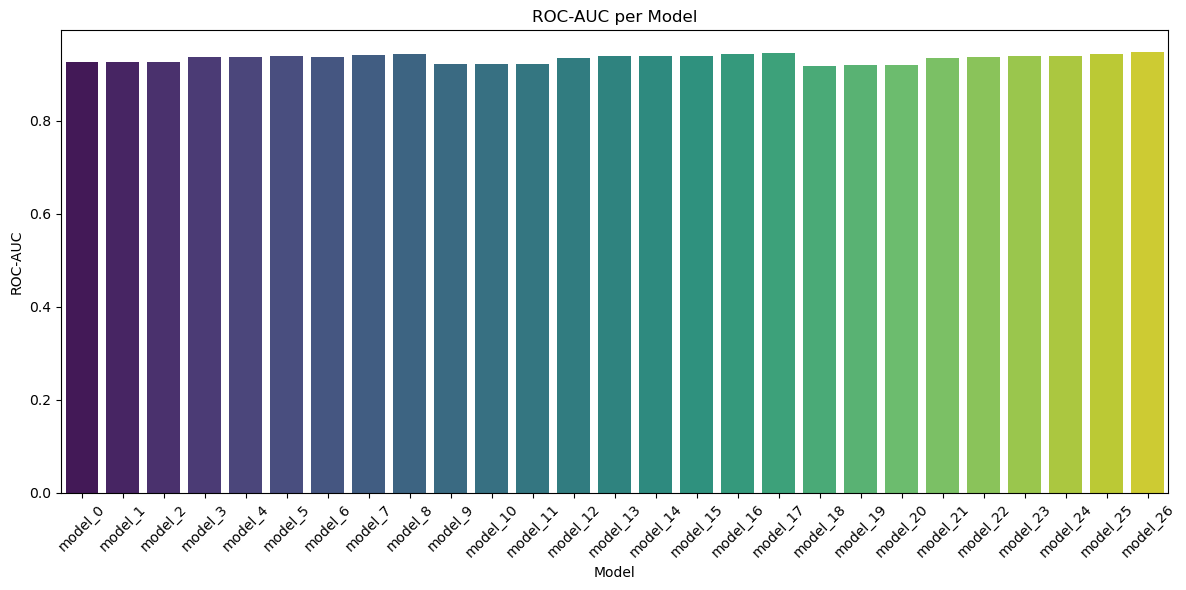

/Users/shimengdai/Dropbox/Michigan State/Eighth semester/disseration/Chapter 3/mcrni/plot.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_df, x='Model', y=metric, palette='viridis')


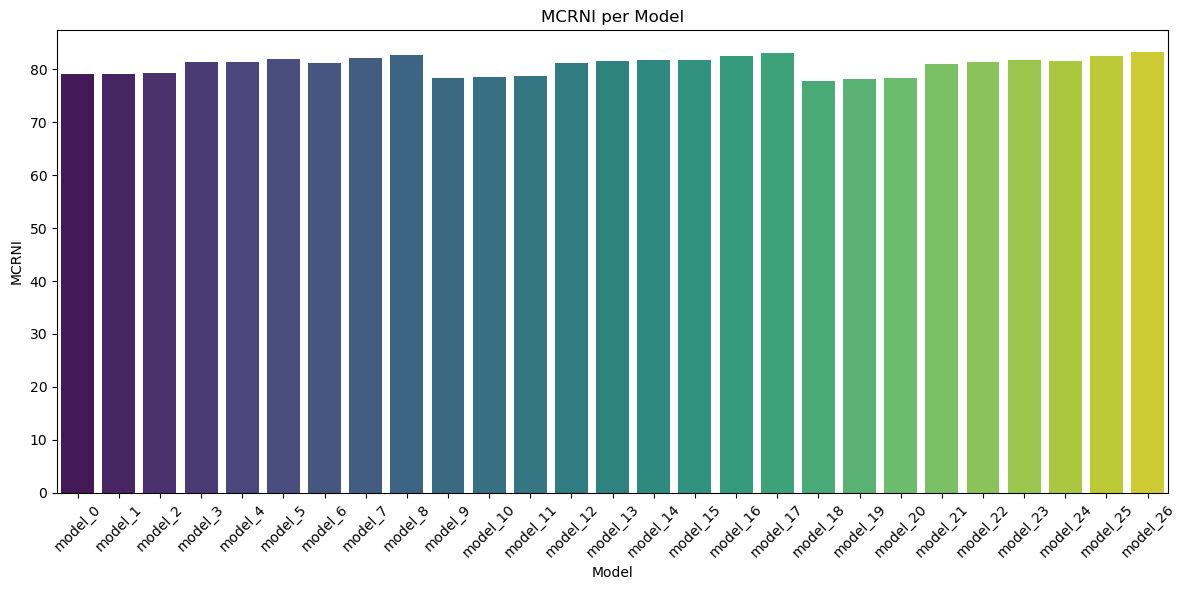

/Users/shimengdai/Dropbox/Michigan State/Eighth semester/disseration/Chapter 3/mcrni/plot.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_df, x='Model', y=metric, palette='viridis')


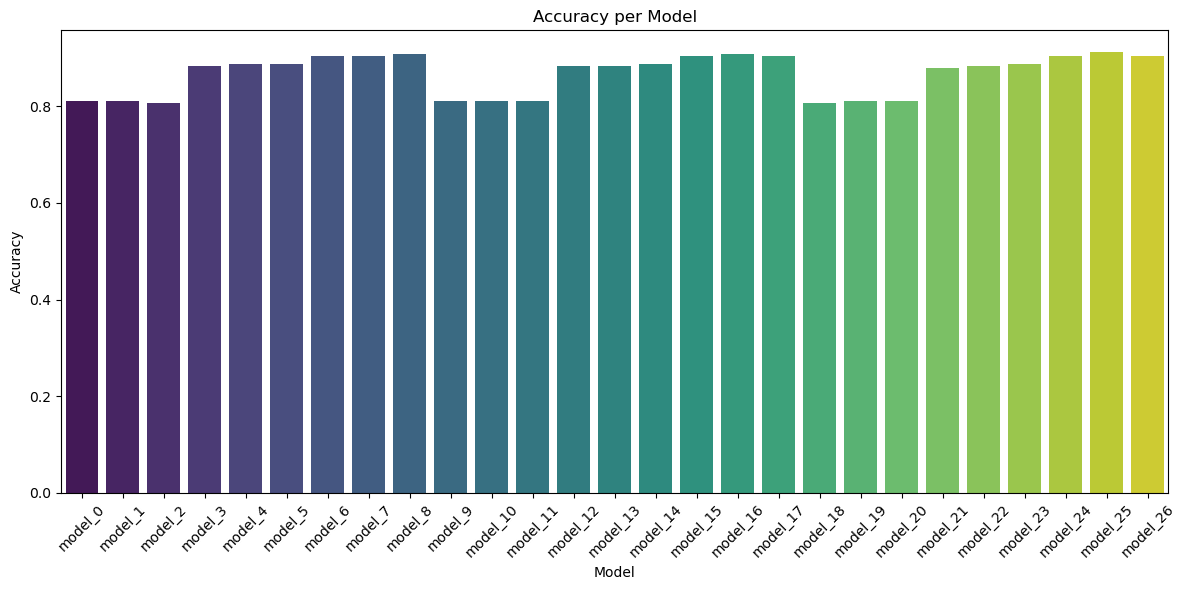

/Users/shimengdai/Dropbox/Michigan State/Eighth semester/disseration/Chapter 3/mcrni/plot.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_df, x='Model', y=metric, palette='viridis')


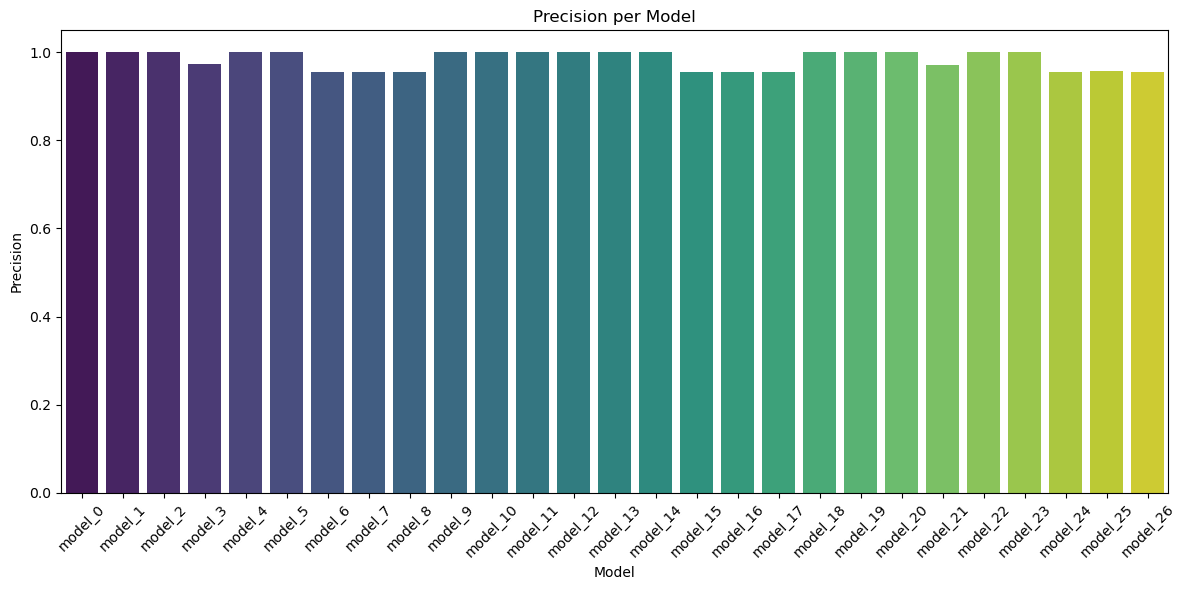

/Users/shimengdai/Dropbox/Michigan State/Eighth semester/disseration/Chapter 3/mcrni/plot.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_df, x='Model', y=metric, palette='viridis')


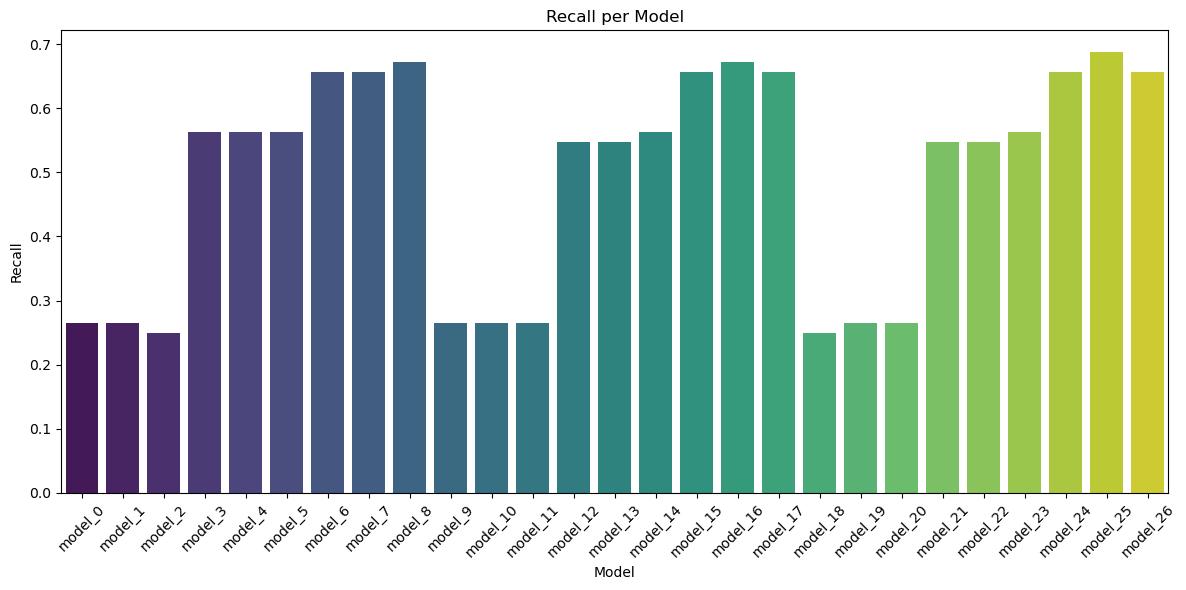

/Users/shimengdai/Dropbox/Michigan State/Eighth semester/disseration/Chapter 3/mcrni/plot.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_df, x='Model', y=metric, palette='viridis')


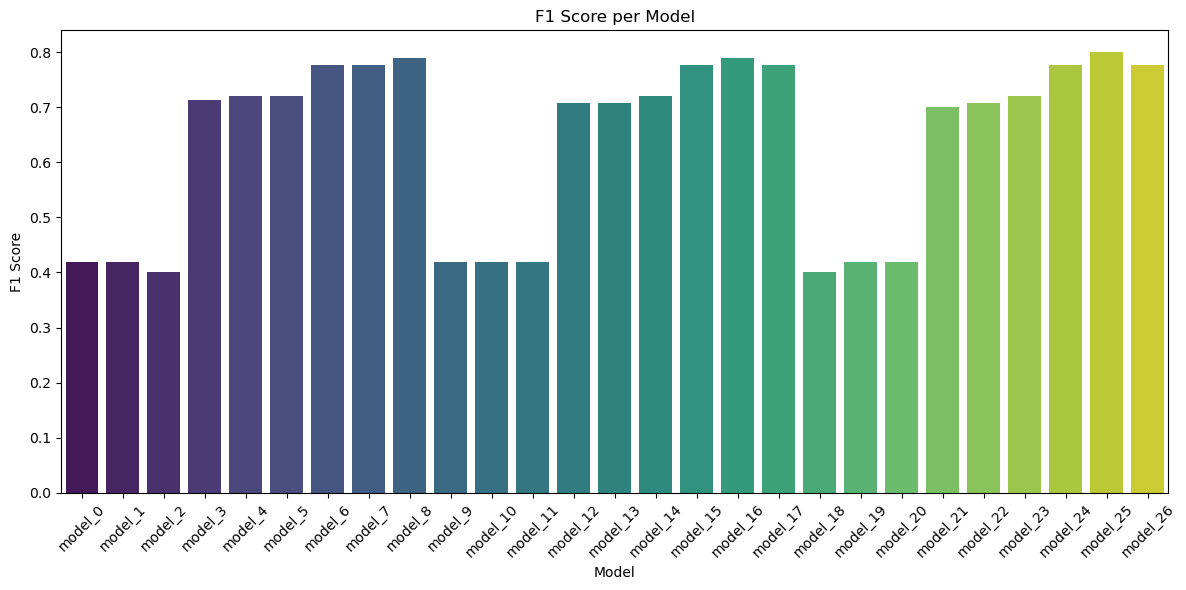

In [12]:
# Correct plot calls
plot.plot_metric_bars(df, metric='ROC-AUC')
plot.plot_metric_bars(df, metric='MCRNI')
plot.plot_metric_bars(df, metric='Accuracy')

plot.plot_metric_bars(df, metric='Precision')
plot.plot_metric_bars(df, metric='Recall')
plot.plot_metric_bars(df, metric='F1 Score')

#plot.plot_scatter_mcrni_vs_metric(df, metric='ROC-AUC')


# AUC Plot 

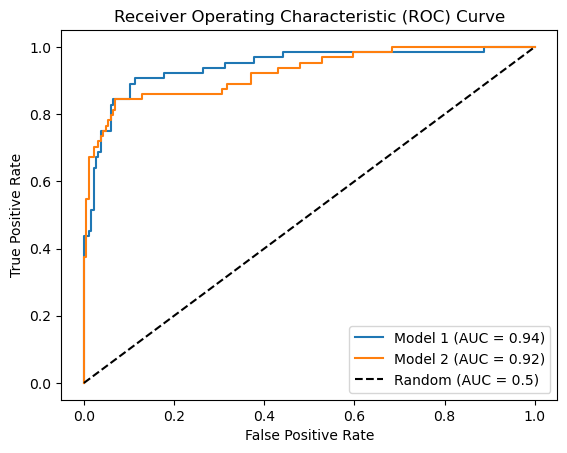

In [8]:

# Load dataset
df = pd.read_csv("input_data/CRT_topic.csv")
y_true = df["label"]
y_scores1 = df["GPT2_CNN_prob"]
y_scores2 = df["TFIDF_RF_prob"]

# Initialize model
model1 = MCRNI(y_true, y_scores1)
model2= MCRNI(y_true, y_scores2)


MCRNI.plot_roc_curves([model1, model2], ["Model 1", "Model 2"])






In [86]:
0.2 + 0.76 + 0.13

1.0899999999999999